### 二手车交易价格预测--T2:数据分析与处理
对二手车交易数据进行训练，预测其交易价格

In [24]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 设置图表中文字属性，防止中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False

In [64]:
# 读取数据
path = '../../dataset/user_car_data/'
train_data = pd.read_csv(path + 'used_car_train.csv', sep=' ')
test_data = pd.read_csv(path + 'used_car_testA.csv', sep=' ')

print('训练数据集的大小', train_data.shape)
print('测试数据集的大小', test_data.shape)

train_data.head()

训练数据集的大小 (150000, 31)
测试数据集的大小 (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


#### EDA
- EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用
- 当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系
- 引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠
- 完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结

### 数据预处理 EDA
1. 载入各种数据科学以及可视化库:
    - 数据科学库 pandas、numpy、scipy；
    - 可视化库 matplotlib、seabon；
    - 其他；
2. 载入数据：
    - 载入训练集和测试集；
    - 简略观察数据(head()+shape)；
3. 数据总览:
    - 通过describe()来熟悉数据的相关统计量
    - 通过info()来熟悉数据类型
4. 判断数据缺失和异常
    - 查看每列的存在nan情况
    - 异常值检测
5. 了解预测值的分布
    - 总体分布概况（无界约翰逊分布等）
    - 查看skewness and kurtosis
    - 查看预测值的具体频数
6. 特征分为类别特征和数值特征，并对类别特征查看unique分布
7. 数值特征分析
    - 相关性分析
    - 查看几个特征得 偏度和峰值
    - 每个数值特征得分布可视化
    - 数值特征相互之间的关系可视化
    - 多变量互相回归关系可视化
8. 类型特征分析
    - unique分布
    - 类别特征箱形图可视化
    - 类别特征的小提琴图可视化
    - 类别特征的柱形图可视化类别
    - 特征的每个类别频数可视化(count_plot)
9. 用pandas_profiling生成数据报告

In [10]:
print(train_data.shape)
train_data.head().append(train_data.tail())

(150000, 31)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [11]:
print(test_data.shape)
test_data.head().append(test_data.tail())

(50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [15]:
# describe
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleID,150000.0,7.499950e+04,43301.414527,0.000000e+00,3.749975e+04,7.499950e+04,1.124992e+05,1.499990e+05
name,150000.0,6.834917e+04,61103.875095,0.000000e+00,1.115600e+04,5.163800e+04,1.188412e+05,1.968120e+05
regDate,150000.0,2.003417e+07,53649.879255,1.991000e+07,1.999091e+07,2.003091e+07,2.007111e+07,2.015121e+07
model,149999.0,4.712902e+01,49.536040,0.000000e+00,1.000000e+01,3.000000e+01,6.600000e+01,2.470000e+02
brand,150000.0,8.052733e+00,7.864956,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,145494.0,1.792369e+00,1.760640,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,141320.0,3.758421e-01,0.548677,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,144019.0,2.249425e-01,0.417546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,150000.0,1.193165e+02,177.168419,0.000000e+00,7.500000e+01,1.100000e+02,1.500000e+02,1.931200e+04
kilometer,150000.0,1.259716e+01,3.919576,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


In [20]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleID,50000.0,1.749995e+05,14433.901067,1.500000e+05,1.624998e+05,1.749995e+05,1.874992e+05,1.999990e+05
name,50000.0,6.854222e+04,61052.808133,0.000000e+00,1.120350e+04,5.224850e+04,1.188565e+05,1.968050e+05
regDate,50000.0,2.003393e+07,53688.696852,1.991000e+07,1.999091e+07,2.003091e+07,2.007110e+07,2.015121e+07
model,50000.0,4.684452e+01,49.469548,0.000000e+00,1.000000e+01,2.900000e+01,6.500000e+01,2.460000e+02
brand,50000.0,8.056240e+00,7.819477,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,48587.0,1.782185e+00,1.760736,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,47107.0,3.734052e-01,0.546442,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,48090.0,2.243502e-01,0.417158,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,50000.0,1.198836e+02,185.097387,0.000000e+00,7.500000e+01,1.090000e+02,1.500000e+02,2.000000e+04
kilometer,50000.0,1.259558e+01,3.908979,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


In [19]:
print(train_data.info())
print('*-'*20)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [23]:
# 数据缺失值与异常值处理
print('训练数据集的缺失值查看：')
print(train_data.isnull().sum())
print('*-'*30)
print('测试数据集的缺失值查看：')
print(test_data.isnull().sum())

训练数据集的缺失值查看：
SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
测试数据集的缺失值查看：
SaleID                  0
name                    0
regDate                 0
model           

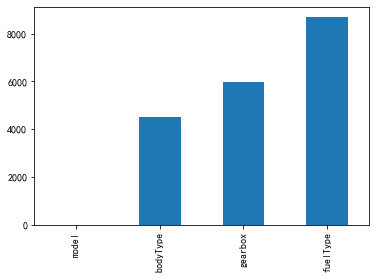

In [28]:
missing_train = train_data.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

通过柱状图可以直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

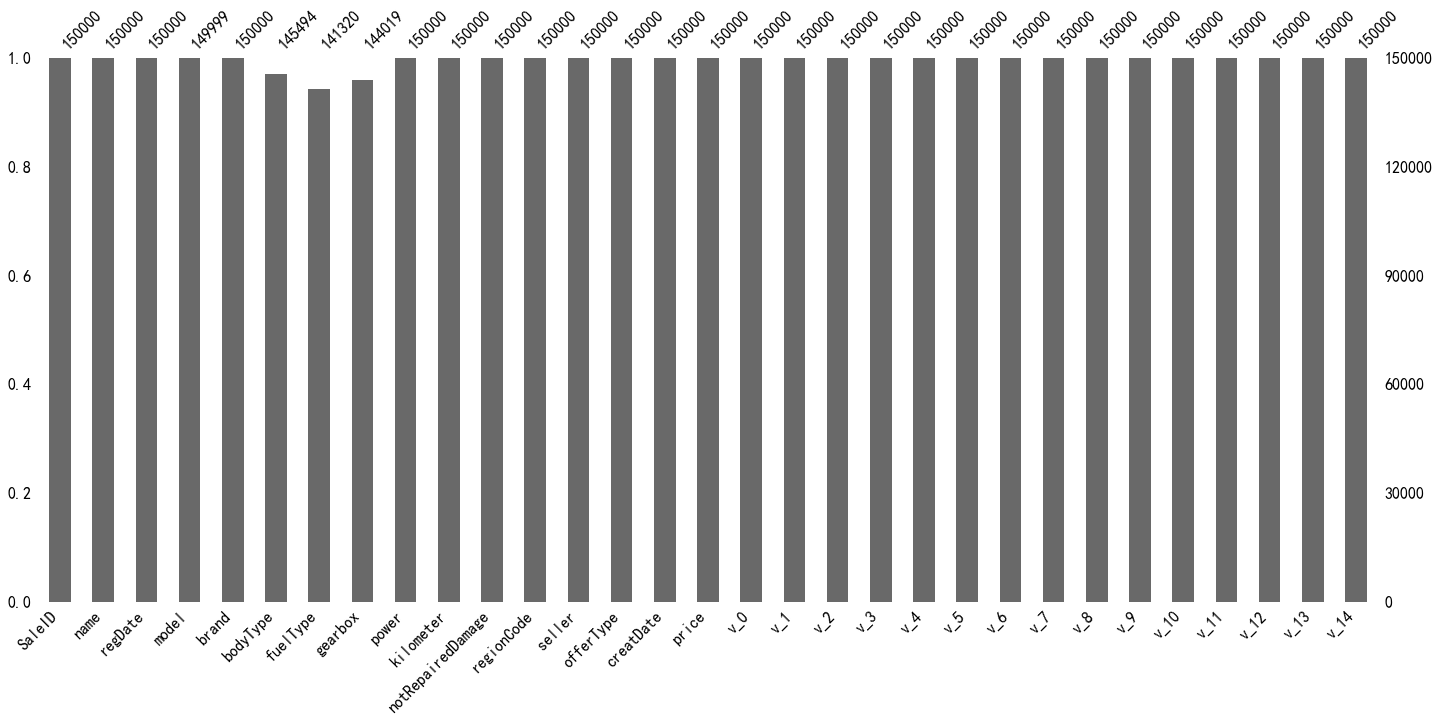

In [66]:
# 可视化下看缺省值
msno.bar(train_data.sample(150000))

In [47]:
# 对object类型的notRepairedDamage进行查看
print('原数据中notRepairedDamage的属性统计：\n', train_data['notRepairedDamage'].value_counts())

原数据中notRepairedDamage的属性统计：
 0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64


In [60]:
# 对‘-’值进行空值处理，用nan代替
train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
print('训练集的notRepairedDamage属性处理后的统计：\n', train_data['notRepairedDamage'].value_counts())

notRepairedDamage属性处理后的统计：
 0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64


In [65]:
print('测试数据集中notRepairedDamage的属性统计：\n', test_data['notRepairedDamage'].value_counts())
test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
print('测试集的notRepairedDamage属性处理后的统计：\n', test_data['notRepairedDamage'].value_counts())

测试数据集中notRepairedDamage的属性统计：
 0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64
测试集的notRepairedDamage属性处理后的统计：
 0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64


In [70]:
# 在先前的describe中seller和offerType倾斜程度过于严重，删除这两个属性
print('训练集中seller属性值查看：\n', train_data['seller'].value_counts())
print('训练集中offerType属性值查看：\n', train_data['offerType'].value_counts())
print('测试集中seller属性值查看：\n', test_data['seller'].value_counts())
print('测试集中offerType属性值查看：\n', test_data['offerType'].value_counts())

del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

训练集中seller属性值查看：
 0    149999
1         1
Name: seller, dtype: int64
训练集中offerType属性值查看：
 0    150000
Name: offerType, dtype: int64
测试集中seller属性值查看：
 0    50000
Name: seller, dtype: int64
测试集中offerType属性值查看：
 0    50000
Name: offerType, dtype: int64


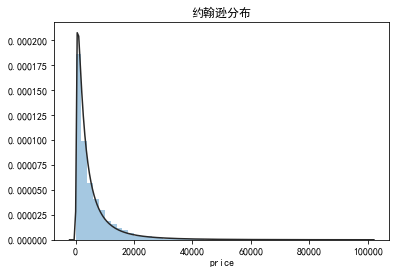

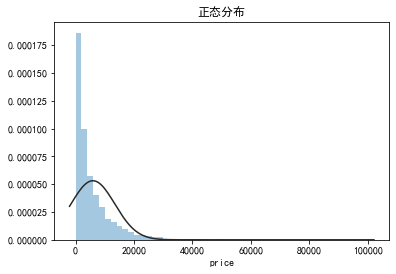

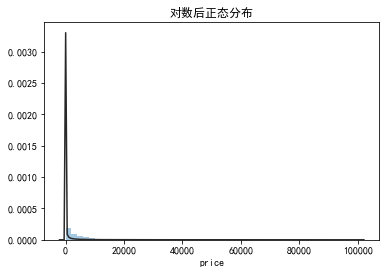

In [85]:
# 查看预测值price的分布
# print(train_data['price'].value_counts())

# price的整体分布概况
import scipy.stats as st
y = train_data['price']
plt.figure(1)
plt.title('约翰逊分布')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('正态分布')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('对数后正态分布')
sns.distplot(y, kde=False, fit=st.lognorm)

可以看出price不服从正态分布，属于偏态分布，因此在回归预测前需要对其进行转换，在对以上三图观察后，最佳拟合是无界约翰逊分布

Skewness: 3.346487
Kurtosis: 18.995183


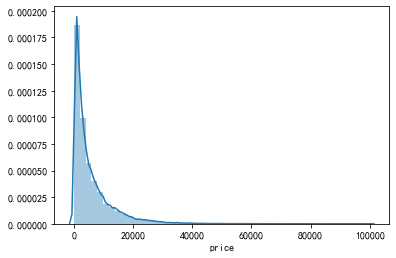

In [88]:
# 对price查看skewness(偏斜系数) and kurtosis(峰值)
sns.distplot(train_data['price'])
print('Skewness: %f' % (train_data['price'].skew()))
print("Kurtosis: %f" % (train_data['price'].kurt()))

In [89]:
print(train_data.skew())
print('*-'*30)
print(train_data.kurt())

SaleID         0.000000
name           0.557606
regDate        0.028495
model          1.484388
brand          1.150760
bodyType       0.991530
fuelType       1.595486
gearbox        1.317514
power         65.863178
kilometer     -1.525921
regionCode     0.688881
creatDate    -79.013310
price          3.346487
v_0           -1.316712
v_1            0.359454
v_2            4.842556
v_3            0.106292
v_4            0.367989
v_5           -4.737094
v_6            0.368073
v_7            5.130233
v_8            0.204613
v_9            0.419501
v_10           0.025220
v_11           3.029146
v_12           0.365358
v_13           0.267915
v_14          -1.186355
dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
SaleID          -1.200000
name            -1.039945
regDate         -0.697308
model            1.740483
brand            1.076201
bodyType         0.206937
fuelType         5.880049
gearbox         -0.264161
power         5733.451054
kilometer        1

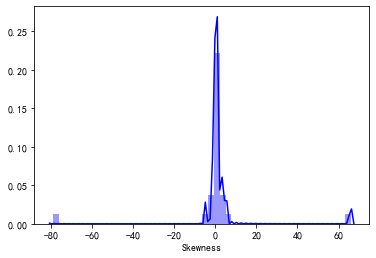

In [90]:
sns.distplot(train_data.skew(),color='blue',axlabel ='Skewness')

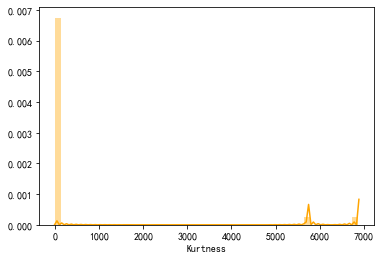

In [91]:
sns.distplot(train_data.kurt(),color='orange',axlabel ='Kurtness')

skew、kurt说明参考https://www.cnblogs.com/wyy1480/p/10474046.html